In [1]:
!pip install dill
from google.colab import drive
import os
import dill
# Mount your Google Drive to '/content/drive'
drive.mount('/content/drive')

# Construct the full path to your file
file_path = os.path.join('/content/drive', 'MyDrive', 'dataset', 'WELFake_Dataset.csv')
file_path1 = os.path.join('/content/drive', 'MyDrive', 'dataset', 'unsupervised_fasttext_model.bin')
# Now you can use 'file_path' to access your file
# For example, to read the file using pandas:
# import pandas as pd
# df = pd.read_csv(file_path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.4 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(file_path)

In [4]:
print(data.shape)

(72134, 4)


In [5]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
print(data.isnull().sum())

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64


In [7]:
data=data.fillna(' ')

In [8]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
# Download necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# Load the stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
# Preprocessing Functions
def preprocess_text(text):
    """Lowercase and remove non-essential characters."""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Keep only alphanumeric and spaces
    return text

In [13]:
def tokenize_and_remove_stopwords(text):
    """Tokenize and remove stopwords."""
    sentences = sent_tokenize(text)
    tokens = [word_tokenize(sentence) for sentence in sentences]
    filtered_tokens = [[word for word in token_list if word not in stop_words] for token_list in tokens]
    return filtered_tokens

In [14]:
def regex_filter(text):
    """Remove numbers, URLs, emails, and phone numbers."""
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', '', text)  # Remove phone numbers
    return text

In [15]:
import re
def fin(text):
  text=  re.sub(r'[^\w\s]', ' ',text)
  text = re.sub(r'[ \n]+', ' ', text)
  return text

In [16]:
def lemmatize_text(tokens):
    """Lemmatize tokens."""
    lemmatized_tokens = [[lemmatizer.lemmatize(word) for word in token_list] for token_list in tokens]
    return lemmatized_tokens

In [17]:
def full_preprocess_pipeline(text):
    """Complete preprocessing pipeline for a single text."""
    text = preprocess_text(text)  # Lowercase and remove non-essential characters
    text = regex_filter(text)  # Remove numbers, URLs, emails, phone numbers
    text = fin(text)  # Remove special characters and unwanted spaces
    tokens = tokenize_and_remove_stopwords(text)  # Tokenize and remove stopwords
    lemmatized_tokens = lemmatize_text(tokens)  # Lemmatize the tokens
    cleaned_text = ' '.join([word for sentence in lemmatized_tokens for word in sentence])
    return cleaned_text

In [18]:
# # Load DataFrame (Example: replace 'your_data.csv' with your actual file)
# df = pd.read_csv('your_data.csv')

# Apply preprocessing to the 'title' and 'text' columns
# Apply preprocessing to the 'text' column
!pip install nltk
import nltk
nltk.download('punkt_tab')
data['cleaned_text'] = data['text'].apply(full_preprocess_pipeline)
data['cleaned_title'] = data['title'].apply(full_preprocess_pipeline)

# Optionally, drop the 'Unnamed: 0' column if it's not needed
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Show the processed dataframe
print(data.head())
file_pathpd = '/content/drive/MyDrive/dataset/processed_data.csv'

# Save the processed dataframe to a new CSV file
data.to_csv(file_pathpd, index=False)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                        cleaned_text  \
0  comment expected barack obama member fyf fukyo...   
1                          post vote hillary already   
2  demonstrator gathered last night exercising co...   
3  dozen politically active pastor came private d...   
4  r

In [19]:
processed_data=pd.read_csv(file_pathpd)

In [20]:
print(processed_data.head())

                                               title  \
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1                                                      
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3  Bobby Jindal, raised Hindu, uses story of Chri...   
4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  \
0  No comment is expected from Barack Obama Membe...      1   
1     Did they post their votes for Hillary already?      1   
2   Now, most of the demonstrators gathered last ...      1   
3  A dozen politically active pastors came here f...      0   
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1   

                                        cleaned_text  \
0  comment expected barack obama member fyf fukyo...   
1                          post vote hillary already   
2  demonstrator gathered last night exercising co...   
3  dozen politically active pastor came private d...   
4  r

In [21]:
from gensim.corpora import Dictionary

# Tokenize the processed texts (each document is a list of words)
processed_data1 = [text.split() for text in data['cleaned_text']]

# Create a dictionary and a corpus
dictionary = Dictionary(processed_data1)
corpus = [dictionary.doc2bow(doc) for doc in processed_data1]

# Train the LDA model
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# View the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.008*"people" + 0.007*"one" + 0.007*"like" + 0.005*"time" + 0.004*"even"')
(1, '0.015*"said" + 0.012*"u" + 0.010*"state" + 0.008*"government" + 0.006*"military"')
(2, '0.017*"said" + 0.010*"state" + 0.009*"would" + 0.009*"u" + 0.006*"year"')
(3, '0.021*"said" + 0.019*"mr" + 0.009*"police" + 0.006*"city" + 0.005*"m"')
(4, '0.031*"trump" + 0.014*"clinton" + 0.009*"said" + 0.009*"president" + 0.008*"republican"')


In [22]:
file_pathlda = '/content/drive/MyDrive/dataset/lda_model.gensim'
file_pathdic = '/content/drive/MyDrive/dataset/lda_dictionary.gensim'
# Save the LDA model
lda_model.save(file_pathlda)

# Save the dictionary for future use
dictionary.save(file_pathdic)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

# # Load your dataset (assuming it has 'text' column)
# df = pd.read_csv('your_data.csv')

# Step 1: Split the dataset into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(processed_data, test_size=0.2, random_state=42)
file_pathtrn = '/content/drive/MyDrive/dataset/train_unsupervised.txt'
file_pathtst = '/content/drive/MyDrive/dataset/test_unsupervised.txt'
# Save the text column from train and test sets to separate text files
train_df['cleaned_text'].to_csv(file_pathtrn, index=False, header=False)
test_df['cleaned_text'].to_csv(file_pathtst, index=False, header=False)


In [24]:
test=pd.read_csv(file_pathtst)
train=pd.read_csv(file_pathtrn)

In [25]:
print(train.head())
print("........")
print(test.head())

  although tesla ceo elon musk shocked silicon valley breaking rank become official member white house manufacturing job initiative value tesla stock billion since election donald trump president dizzying week executive order covering obamacare trade immigration president trump held approval rating percent likely voter according rasmussen report daily presidential tracking poll slightly percent level president obama left office voter welcomed president trump decision scrap partnership tpp deal agree north american free trade agreement nafta mexico canada need reworked although supporter argue free trade make product cheaper u consumer american believe whopping percent percent margin important keep manufacturing job united state keep price low u consumer american strongly believe buying u made good emphasize way nation moving white house announced creation manufacturing job initiative develop best promote job growth get american back work participant include number fortune ceo deputy ch

In [26]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296187 sha256=ba8d3ad67f644371ad070c6e4355c3de857ca09f8585a895722017b0d210741d
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [27]:
import fasttext

# # Step 2: Train FastText in unsupervised mode on your training data
# # You can adjust parameters like dim (embedding size), minCount (minimum word count), and epoch (number of iterations)
# unsupervised_model = fasttext.train_unsupervised(input='train_unsupervised.txt', model='cbow', dim=100, epoch=5)

# # Save the trained model
# unsupervised_model.save_model('unsupervised_fasttext_model.bin')
ft_model = fasttext.load_model(file_path1)

In [28]:
import numpy as np

# Step 3: Function to create FastText embeddings for each text
def text_to_fasttext_embeddings(text, ft_model):
    words = text.split()
    embeddings = []

    # Get the vector for each word in the text and append it to the list
    for word in words:
        vector = ft_model.get_word_vector(word)
        embeddings.append(vector)

    # Return the mean of all word vectors or a zero vector if no valid words are found
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(ft_model.get_dimension())

# Step 4: Generate embeddings for the training and testing sets
train_df['embedding'] = train_df['text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model))
test_df['embedding'] = test_df['text'].apply(lambda x: text_to_fasttext_embeddings(x, ft_model))

# Convert the embeddings to a NumPy array
X_train_fasttext = np.vstack(train_df['embedding'].values)
X_test_fasttext = np.vstack(test_df['embedding'].values)
embeddingtrn = '/content/drive/MyDrive/dataset/train_unsupervised_fasttext_embeddings.npy'
embeddingtst = '/content/drive/MyDrive/dataset/test_unsupervised_fasttext_embeddings.npy'
# Save the embeddings for future use
np.save(embeddingtrn, X_train_fasttext)
np.save(embeddingtst, X_test_fasttext)

# Now X_train_fasttext and X_test_fasttext contain the FastText embeddings for each text in your train and test sets

# import numpy as np
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Assuming X_train and X_test are your text data
# texts = train + test  # Combine all text data for fitting tokenizer

# # Tokenize the text data
# tokenizer = Tokenizer(num_words=20000)  # Adjust vocab size if needed
# tokenizer.fit_on_texts(texts)
# word_index = tokenizer.word_index

# # Load the trained FastText model
# ft_model = fasttext.load_model("unsupervised_fasttext_model.bin")

# # Prepare the embedding matrix
# embedding_dim = 300  # FastText uses 300-dimensional vectors
# vocab_size = min(20000, len(word_index)) + 1  # Limit to the top 20,000 words

# embedding_matrix = np.zeros((vocab_size, embedding_dim))
# for word, i in word_index.items():
#     if i < vocab_size:
#         embedding_vector = ft_model.get_word_vector(word)
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector

# # Tokenize and pad the sequences
# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# max_len = 100  # Adjust the maximum sequence length based on your dataset
# X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
# X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# # One-hot encode the labels (for binary or multi-class classification)
# y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=2)  # Adjust for number of classes
# y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=2)



In [29]:
print(X_train_fasttext)
print(X_test_fasttext)

[[ 0.17554973 -0.52096575 -0.1078163  ...  0.66298997  0.63904387
   0.68554854]
 [ 0.49323449 -0.23665561 -0.20039538 ...  0.96383893  1.01492238
   1.12369072]
 [ 0.48764396 -0.75924635 -0.50108862 ...  0.95653796  0.87599832
   1.00468469]
 ...
 [ 0.59844947 -0.54552424 -0.06093487 ...  0.94911599  0.90300143
   0.98139298]
 [ 0.29258704 -0.19258811 -0.3146027  ...  1.01749802  0.97033
   1.10091448]
 [-0.7436946   0.25242326 -0.30307302 ...  1.25737131  1.09988725
   0.57284421]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.18685398  0.48486984 -0.71876478 ...  1.10150957  1.14427578
   0.80322075]
 [ 0.66016179 -0.6914624  -0.55320317 ...  0.8531999   0.68031335
   1.25694096]
 ...
 [ 0.03560773 -0.21688031 -0.12615536 ...  0.89539504  1.18233085
   0.79932648]
 [ 0.69188648 -0.33090904 -0.54671174 ...  0.76415724  1.00336146
   1.20778692]
 [-0.20051064 -0.22768554 -0.21633528 ...  0.8451665   0.72988969
   0.65683216]]


In [30]:
from tensorflow.keras.utils import to_categorical

# Reshape the FastText embeddings for CNN-LSTM model (samples, timesteps, features)
X_train_reshaped = X_train_fasttext.reshape((X_train_fasttext.shape[0], X_train_fasttext.shape[1], 1))
X_test_reshaped = X_test_fasttext.reshape((X_test_fasttext.shape[0], X_test_fasttext.shape[1], 1))

# Assuming binary classification (for multi-class adjust num_classes)
y_train_encoded = to_categorical(train_df['label'], num_classes=2)
y_test_encoded = to_categorical(test_df['label'], num_classes=2)


In [31]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_train_reshaped, y_train_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (34624, 100, 1), Validation set: (11541, 100, 1), Test set: (11542, 100, 1)


In [32]:
print(X_val)
print(X_test)
print(y_val)
print(y_test)
print(X_train_reshaped)
print(X_test_reshaped)
print(y_train_encoded)
print(y_test_encoded)

[[[ 0.69210875]
  [-0.41255772]
  [-0.66549504]
  ...
  [ 0.7820015 ]
  [ 0.89356333]
  [ 1.11530769]]

 [[ 0.47416061]
  [-0.09963874]
  [-0.73387194]
  ...
  [ 1.00302446]
  [ 1.22160602]
  [ 1.17819858]]

 [[ 0.84921771]
  [-0.99159318]
  [-0.86159539]
  ...
  [ 0.44077453]
  [ 1.01122582]
  [ 1.12898207]]

 ...

 [[ 0.02455475]
  [ 0.16317454]
  [-1.08726537]
  ...
  [ 1.02425468]
  [ 1.92793584]
  [ 1.246346  ]]

 [[ 0.65895236]
  [-0.57666206]
  [-0.72628003]
  ...
  [ 0.89807743]
  [ 1.14758062]
  [ 1.21872783]]

 [[ 0.07549055]
  [ 0.27253267]
  [-0.16433154]
  ...
  [ 1.36499274]
  [ 0.93156898]
  [ 1.18605101]]]
[[[-0.60276049]
  [ 0.53101104]
  [-0.01236581]
  ...
  [ 0.81259811]
  [ 0.78422081]
  [ 0.64419621]]

 [[ 0.44593367]
  [-0.29877302]
  [-0.51471835]
  ...
  [ 0.91234148]
  [ 1.4317292 ]
  [ 1.05805528]]

 [[ 0.24087217]
  [-0.44621244]
  [-0.40400544]
  ...
  [ 0.94924182]
  [ 0.91439569]
  [ 0.93736988]]

 ...

 [[ 0.31539631]
  [-0.48651507]
  [-0.01846319]
  ..

In [33]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical


In [34]:
# Reshape FastText embeddings for CNN-LSTM model (samples, timesteps, features)
X_train_reshaped = X_train_fasttext.reshape((X_train_fasttext.shape[0], X_train_fasttext.shape[1], 1))
X_test_reshaped = X_test_fasttext.reshape((X_test_fasttext.shape[0], X_test_fasttext.shape[1], 1))

# One-hot encode labels (assuming binary classification)
y_train_encoded = to_categorical(train_df['label'], num_classes=2)
y_test_encoded = to_categorical(test_df['label'], num_classes=2)


In [42]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)


In [36]:
from gensim.corpora import Dictionary

# Tokenize the processed texts (each document is a list of words)
processed_data1 = [text.split() for text in data['cleaned_text']]

# Create a dictionary and a corpus
dictionary = Dictionary(processed_data1)
corpus = [dictionary.doc2bow(doc) for doc in processed_data1]

# Train the LDA model
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# View the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.018*"said" + 0.011*"u" + 0.010*"state" + 0.007*"government" + 0.006*"united"')
(1, '0.031*"trump" + 0.009*"clinton" + 0.007*"president" + 0.007*"people" + 0.006*"donald"')
(2, '0.007*"said" + 0.006*"one" + 0.006*"people" + 0.005*"year" + 0.005*"mr"')
(3, '0.016*"said" + 0.011*"state" + 0.009*"would" + 0.008*"trump" + 0.008*"mr"')
(4, '0.014*"clinton" + 0.010*"email" + 0.009*"said" + 0.008*"fbi" + 0.007*"investigation"')


In [37]:
# Generate topic distributions for each document
lda_topic_vectors = [lda_model.get_document_topics(bow, minimum_probability=0) for bow in corpus]

# Convert to dense format for model compatibility
lda_topic_vectors = [[prob for _, prob in doc] for doc in lda_topic_vectors]

# Convert to numpy array
lda_topic_vectors = np.array(lda_topic_vectors)


In [38]:
from sklearn.model_selection import train_test_split

# Assuming `data['cleaned_text']` corresponds to your train/test split
lda_topic_vectors_train, lda_topic_vectors_test = train_test_split(
    lda_topic_vectors, test_size=0.2, random_state=42
)


In [39]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Flatten


def create_cnn_lstm_with_lda(input_shape_seq, input_shape_lda, num_classes):
    # Define input layers
    input_seq = Input(shape=input_shape_seq, name="sequential_input")
    input_lda = Input(shape=input_shape_lda, name="lda_input")

    # CNN layers for sequential data
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_seq)
    x = MaxPooling1D(pool_size=2)(x)

    # LSTM layer
    x = LSTM(64, return_sequences=True)(x)

    # Attention layer
    attention = Attention()(x)

    # Flatten LSTM output
    x = Flatten()(attention)

    # Concatenate LDA features
    x = Concatenate()([x, input_lda])

    # Fully connected layers
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Build and compile model
    model = Model(inputs=[input_seq, input_lda], outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [40]:
import numpy as np

# Convert LDA topic vectors to a NumPy array
lda_topic_vectors_train = np.array(lda_topic_vectors_train)
lda_topic_vectors_test = np.array(lda_topic_vectors_test)

# Define input shape for LDA features
input_shape_lda = (lda_topic_vectors_train.shape[1],)


In [43]:
# Define input shapes
input_shape_seq = (X_train_reshaped.shape[1], 1)  # Shape for sequential data
input_shape_lda = (lda_topic_vectors_train.shape[1],)  # Shape for LDA topic vectors
num_classes = 2  # Number of classes

# Create the model
cnn_lstm_model_with_lda = create_cnn_lstm_with_lda(input_shape_seq, input_shape_lda, num_classes)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = cnn_lstm_model_with_lda.fit(
    [X_train_reshaped, lda_topic_vectors_train],  # Sequential data and LDA features as inputs
    y_train_encoded,  # Target labels
    epochs=20,
    batch_size=32,
    validation_data=([X_test_reshaped, lda_topic_vectors_test], y_test_encoded),  # Validation inputs
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.7667 - loss: 0.4897 - val_accuracy: 0.8563 - val_loss: 0.3378 - learning_rate: 0.0010
Epoch 2/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.8516 - loss: 0.3429 - val_accuracy: 0.8582 - val_loss: 0.3273 - learning_rate: 0.0010
Epoch 3/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.8699 - loss: 0.3055 - val_accuracy: 0.8787 - val_loss: 0.2728 - learning_rate: 0.0010
Epoch 4/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8781 - loss: 0.2884 - val_accuracy: 0.8872 - val_loss: 0.2585 - learning_rate: 0.0010
Epoch 5/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - accuracy: 0.8887 - loss: 0.2646 - val_accuracy: 0.8962 - val_loss: 0.2427 - learning_rate: 0.0010
Epoch 6/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.8947 - loss: 0.2540 - val_accuracy: 0.8955 - val_loss: 0.2439 - learning_rate: 0.0010
Epoch 7/20
1804/1804 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accura

In [44]:
file_pathtrndatt = '/content/drive/MyDrive/dataset/cnn_lstm_modelattentionldafinal1.keras'



In [47]:
cnn_lstm_model_with_lda.save(file_pathtrndatt)

In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import get_custom_objects

# Assume your 'Attention' class definition is available here or imported
# from your custom module where you defined it.

# For example:
# class Attention(Layer):
#     # ... your Attention layer implementation ...

# Register the custom layer
get_custom_objects().update({'Attention': Attention})

# Now load the model
cnn_lstm_modelatt = load_model(file_pathtrndatt)

In [56]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_lstm_model_with_lda.evaluate(
    [X_test_reshaped, lda_topic_vectors_test],  # Provide both sequential and LDA inputs
    y_test_encoded  # Target labels
)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9316 - loss: 0.1721
Test Loss: 0.17081907391548157, Test Accuracy: 0.931101381778717


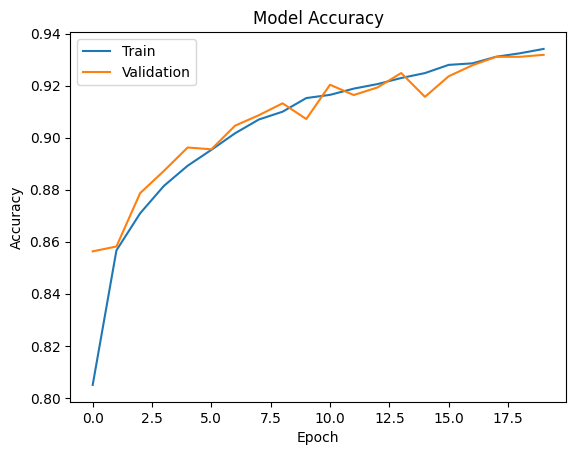

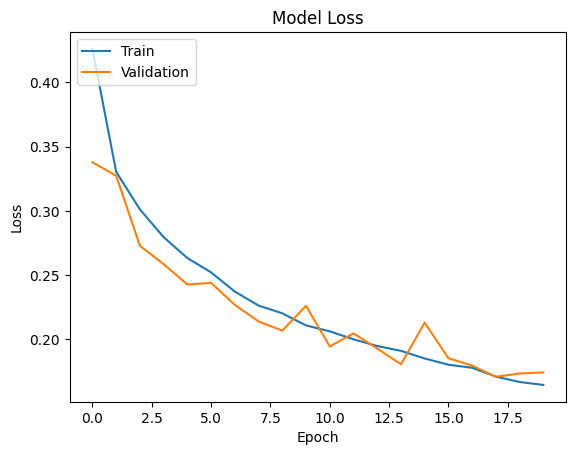

In [51]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


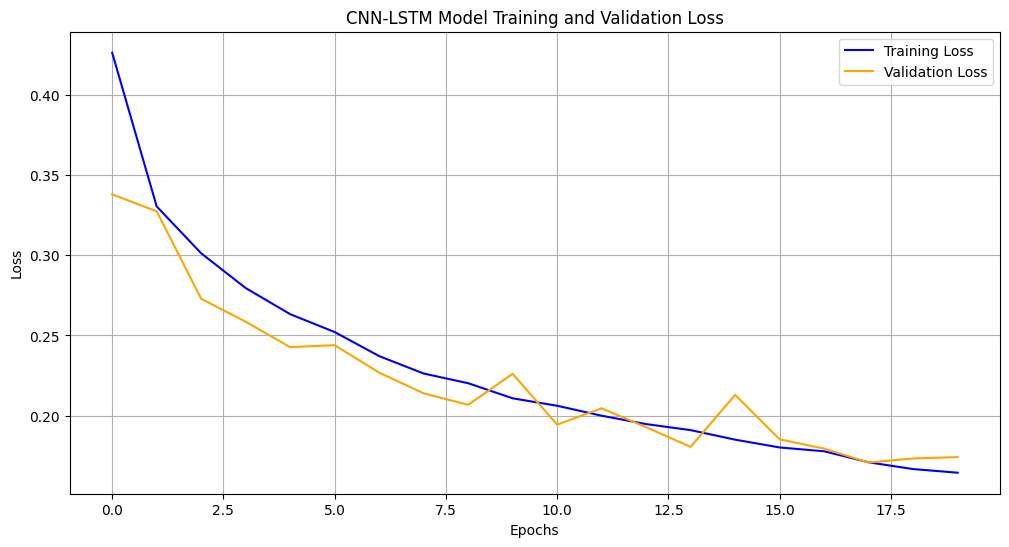

In [52]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of the model.fit() function
# For example: history = model.fit(X_train_reshaped, y_train_encoded, validation_data=(X_test_reshaped, y_test_encoded), epochs=10, batch_size=32)

# Plotting the loss curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('CNN-LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


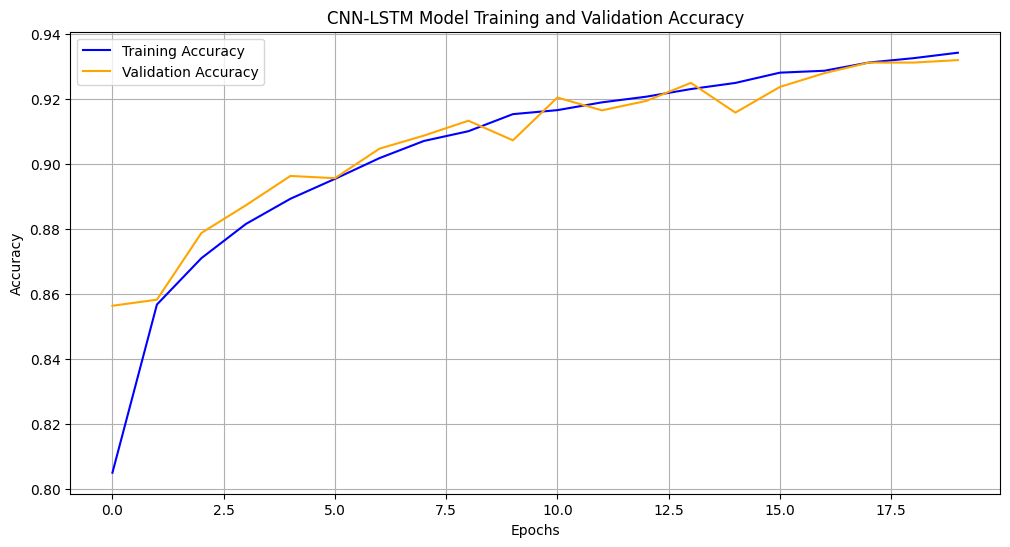

In [53]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of the model.fit() function
# For example: history = model.fit(X_train_reshaped, y_train_encoded, validation_data=(X_test_reshaped, y_test_encoded), epochs=10, batch_size=32)

# Plotting the accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('CNN-LSTM Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


451/451 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


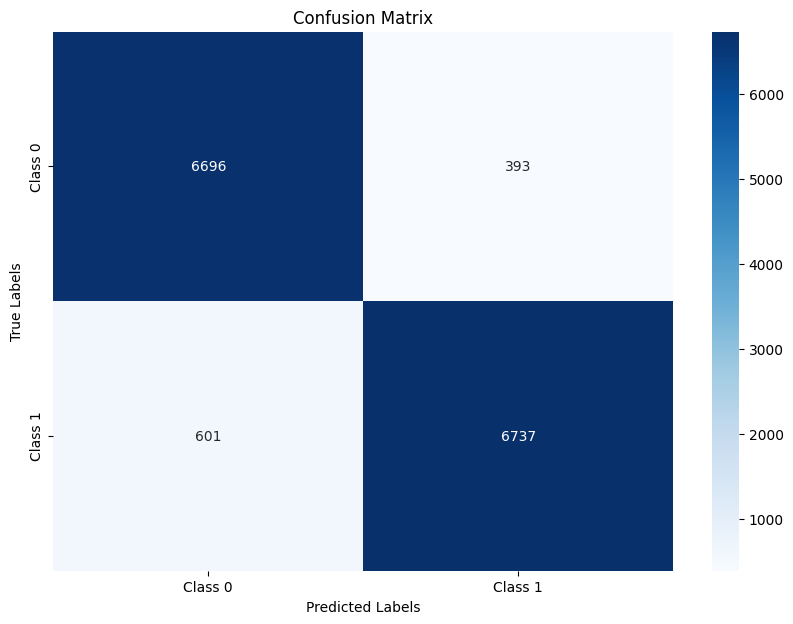

              precision    recall  f1-score   support

     Class 0       0.92      0.94      0.93      7089
     Class 1       0.94      0.92      0.93      7338

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Step 5: Make predictions on the test set
y_pred_probs = cnn_lstm_model_with_lda.predict([X_test_reshaped, lda_topic_vectors_test])
y_pred = np.argmax(y_pred_probs, axis=1)  # Get class labels from probabilities
y_true = np.argmax(y_test_encoded, axis=1)  # True labels

# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 8: Print classification report
print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1']))


In [59]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


lime

In [60]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=79cfffc525cdb97863fd5d3a133bd59820b0e9473fc472aa31d93ee07e5c9061
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [61]:
import numpy as np
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.pipeline import make_pipeline


In [75]:
def preprocess_and_predict(text, lda_vectors,cnn_lstm_model, ft_model, max_len=100):
    # Step 1: Create embeddings for sequential input
    embeddings = []
    for single_text in text:
        words = single_text.split()
        text_embedding = []
        for word in words:
            vector = ft_model.get_word_vector(word)
            text_embedding.append(vector)

        # If no valid word vectors, use a zero vector
        if text_embedding:
            embeddings.append(np.mean(text_embedding, axis=0))
        else:
            embeddings.append(np.zeros(ft_model.get_dimension()))

    # Convert list to numpy array
    embeddings = np.array(embeddings)

    # Ensure embeddings are 2D (samples, features)
    if embeddings.ndim == 1:
        embeddings = embeddings.reshape(1, -1)

    # Check the number of features (shape[1])
    num_features = embeddings.shape[1]

    # Pad or truncate to the max_len
    if num_features < max_len:
        padding = np.zeros((embeddings.shape[0], max_len - num_features))
        embeddings = np.concatenate((embeddings, padding), axis=1)
    elif num_features > max_len:
        embeddings = embeddings[:, :max_len]

    # Reshape to match sequential input shape (samples, timesteps, 1)
    X_seq = embeddings.reshape(embeddings.shape[0], max_len, 1)

    # Step 2: Use LDA vectors as the second input
    X_lda = np.array(lda_vectors)

    # Step 3: Get predictions
    predictions = cnn_lstm_model.predict([X_seq, X_lda])
    return predictions


In [67]:
explainer = LimeTextExplainer(class_names=['not fake', 'fake'])


In [81]:
def lime_predict(text):
    # Create an index mapping for cleaned_text
    text_index_map = {text: index for index, text in enumerate(data['cleaned_text'].tolist())}

    # Get the LDA vectors for the sample(s), using the index mapping for faster lookup
    lda_vectors_for_sample = [lda_topic_vectors[text_index_map.get(text_sample, 0)]
                              for text_sample in text]  # Use 0 (or any default index) if not found

    predictions = preprocess_and_predict(text, lda_vectors_for_sample, cnn_lstm_modelatt, ft_model, max_len=100)
    return predictions

In [76]:
# def lime_predict(text):

#     predictions = preprocess_and_predict(text,lda_topic_vectors , cnn_lstm_modelatt, ft_model,max_len=100 )
#     return predictions


In [82]:
# Choose a text sample for explanation
sample_text = data['cleaned_text'].iloc[0]

# Generate explanation
explanation = explainer.explain_instance(
    sample_text,
    lime_predict,
    num_features=10  # Number of words to include in the explanation
)

# Display explanation
explanation.show_in_notebook(text=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
